# Project SURAKSHA : Enabling awareness

<div class = "alert alert-block alert-success">

 - <b>Version</b> : 1.0

 - <b>Authors</b> : 
    -  Anjali Muralidharan<br>
    -  Chitra Nair<br>
    -  Kavish Jhaveri<br>
    -  Simantini Ghosh<br>
    -  Sonal Rai
            
-  Built in association with Indian School of Business,Hyderbad as part of Capstone Project
</div>

### Problem Description:

To create a prototype for a mobile app that ensures women & child safety though the following modules
1.	Share Live Location & Details - With a chosen few, integrate with cab giants to link and display driver details to the chosen person receiving live updates
2.	Map the City Down Based On Safety Index - Provide real time alerts when in a zone/area with a poor safety rating, citations on prior crimes committed
3.	SOS Functionality: App Profile to Integrate with Women & Police Helplines Based on subject's zip code and make calls in need
4.	Offline Mode: The app must share data while offline (TBD)
5.	Prescriptive Prompts !!!: Must deliver real time alerts, if the subject is in an area that is inhabited (by criminal records) by convicted sex offender, child trafficker or other associated crimes with convicts personal identification indicators (Photo etc.) to enable educated decision making.

<div class = "alert alert-block alert-info">
<b>This code snippet is for modelling in order to predict whether a particular location is safe or not. This snippet is integrated with the user interface build using flutter to provide prescriptive prompts to users whenever they enter a location.</b>
</div>

### Dataset

The dataset has features pertaining to crimes committed in the city in hand like crime type, category, date and time of crime,etc.

#### The below experiments will be performed on the dataset provided. The experiment that suggests the best accuracy score will be integrated.

1. Decision Tree
2. Random Forest
3. Gradient Boost
4. KNN
5. XGBoost
6. Logistic Regression

#### Loading relevant libraries

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [366]:
import warnings
warnings.filterwarnings('ignore')

In [367]:
# Print version info for the sake of reproducibility
import sys
import sklearn as skl
print("python " + sys.version)
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)
print("sklearn" + skl.__version__)

python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
pandas 1.3.4
numpy 1.20.3
sklearn1.0.2


#### Loading the Delhi crime data

In [368]:
delhi_crime_data = pd.read_excel("New_Delhi_crime.xlsx") 
delhi_crime_data.head(3)

,Address,Area,City,Category,Day Quarter Group,Day Time,Delhi Districts Cluster,Delhi Incidents Cluster,Id,Incident Category,...,quarter,Delhi_Cluster_code,Delhi_Cluster_code_encode,time_hour,crime_code,Severity_index,Safety_index,Safety_index_code,Safety_index_code_val,Crime
0,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3887,Catcalls/Whistles,...,2,Med,1,1,6,Med,0.038469,Yellow,1,1
1,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Non-Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3996,Ogling/Lewd Facial Expressions/Staring,...,2,Med,1,1,4,Med,0.038469,Yellow,1,1
2,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,4000,Touching /Groping,...,2,Med,1,1,15,High,0.038469,Yellow,1,1


In [369]:
delhi_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19632 entries, 0 to 19631
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Address                    19632 non-null  object        
 1   Area                       19632 non-null  object        
 2   City                       19632 non-null  object        
 3   Category                   19632 non-null  object        
 4   Day Quarter Group          19632 non-null  object        
 5   Day Time                   19632 non-null  object        
 6   Delhi Districts Cluster    19632 non-null  object        
 7   Delhi Incidents Cluster    19632 non-null  object        
 8   Id                         19632 non-null  int64         
 9   Incident Category          19632 non-null  object        
 10  Incident Date              19632 non-null  datetime64[ns]
 11  Incident Time              19632 non-null  datetime64[ns]
 12  Titl

#### Feature set selection

In [370]:
x_features =['Area','time_hour'] #'dayofyear','Category',

In [371]:
delhi_crime_data[x_features]

,Area,time_hour
0,Barakhamba,1
1,Barakhamba,1
2,Barakhamba,1
3,Barakhamba,1
4,Barakhamba,13
...,...,...
19627,Zamrudpur,10
19628,Zamrudpur,23
19629,Zamrudpur,12
19630,Zamrudpur,1


Segregating the features into categorical and numerical

In [104]:
cat_vars = ['Area','time_hour']  #'Category','dayofyear',

In [105]:
num_vars = list(set(x_features) - set(cat_vars))
num_vars

[]

#### Setting x and y variables

In [106]:
#setting X and Y:
X = delhi_crime_data[x_features]
y = delhi_crime_data['Crime']

### Partitioning data to train and test sets

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [109]:
X_train.shape

(14724, 2)

In [110]:
X_test.shape

(4908, 2)

#### Handling data imbalance

1. Oversampling method

In [372]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler()
print(Counter(y_train))
X_oversampled_train, y_oversampled_train = ros.fit_resample(X_train, y_train)
print(Counter(y_oversampled_train))

Counter({0: 10368, 1: 4356})
Counter({1: 10368, 0: 10368})


### Defining Transformations

#### Encoding of categorical variables

1. One hot encoding

In [113]:
from sklearn.preprocessing import OneHotEncoder

ohe_encoder = OneHotEncoder(handle_unknown='ignore')

2. Target encoding

In [373]:
from category_encoders import TargetEncoder

target_encoder = TargetEncoder() 

#### Standardization

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

## Defining models

#### 1. Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=50, random_state=42)

#### 2. Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)

#### 3. Gradient Boost

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
grad_class = GradientBoostingClassifier(learning_rate=0.1,n_estimators = 10, random_state = 42)

#### 4. KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

#### 5. XGBoost

In [374]:
from xgboost.sklearn import XGBClassifier
params = { "n_estimators": 400,
           "max_depth": 5,
           #"objective": 'reg:squarederror',
           "colsample_bytree": 0.8,
           "subsample": 0.75,
          "verbosity":0
          # "lambda": 100
         }

xgb = XGBClassifier(**params)

#### 6. Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 100,max_iter=100)

### Setting scoring metric

In [123]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,precision_score

### Creating pipelines

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [125]:
cat_transformer_ohe = Pipeline( steps = [('ohencoder', ohe_encoder)
                                     ])

In [126]:
cat_transformer_target = Pipeline( steps = [('tencoder', target_encoder)
                                     ])

In [127]:
num_transformer = Pipeline( steps = [('scaler', scaler)                            
                                     ])

In [128]:
preprocessor_ohe = ColumnTransformer(
    transformers=[('cat_ohe',cat_transformer_ohe,cat_vars)
                 , ('num',num_transformer,num_vars)
                 ])

In [129]:
preprocessor_target = ColumnTransformer(
    transformers=[('cat_target',cat_transformer_target,cat_vars)
                 , ('num',num_transformer,num_vars)
                 ])

In [130]:
scorer = make_scorer(accuracy_score)#, average='weighted')

## Decision Tree Experiments

### Pipeline 1.1

Oversampling > One Hot Encoding > Decision Tree > Grid Search > Final Model

In [375]:
dt_v1 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                        ('decisiontree', dtree)])

In [376]:
dt_v1.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('decisiontree',
                 DecisionTreeClassifier(max_depth=50, random_state=42))])

Grid Search

In [377]:
dt_params = { "decisiontree__max_depth":[5,7,8,10,12,14],
                  "decisiontree__criterion":['gini','entropy'],
             "decisiontree__min_samples_leaf":[1,2],
             "decisiontree__min_samples_split":[5,10]
                  }

In [378]:
dt_grid_v1 = GridSearchCV(dt_v1,
                           param_grid=dt_params,
                           cv = 5,
                           scoring = scorer,
                         error_score='raise'
                         )

In [379]:
dt_grid_v1.fit(X_oversampled_train, y_oversampled_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('decisiontree',
                                        DecisionTreeClassifier(max_depth=50,
                                                               random_state=42))]),
             param_grid={'decisiontree__criterion': ['gini', 'entropy'],
                         'decisiontree__max_depth': [5, 7, 8, 10, 12, 14],
                         'decisiontree__min_samples_leaf': [1, 2],
                         'decisiontree__min_samples_split': [5, 10]},
             scoring=make_scorer(accuracy_score))

In [380]:
dt_grid_v1.best_params_

{'decisiontree__criterion': 'entropy',
 'decisiontree__max_depth': 14,
 'decisiontree__min_samples_leaf': 1,
 'decisiontree__min_samples_split': 5}

In [381]:
dt_grid_v1.best_score_

0.9516300312595993

In [382]:
dt_grid_results = pd.DataFrame( dt_grid_v1.cv_results_ )
dt_grid_results[['param_decisiontree__criterion','param_decisiontree__max_depth', 'mean_test_score', 'std_test_score']]

,param_decisiontree__criterion,param_decisiontree__max_depth,mean_test_score,std_test_score
0,gini,5,0.890575,0.074212
1,gini,5,0.890575,0.074212
2,gini,5,0.890575,0.074212
3,gini,5,0.890575,0.074212
4,gini,7,0.919270,0.044992
5,gini,7,0.919270,0.044992
6,gini,7,0.919270,0.044992
7,gini,7,0.919270,0.044992
8,gini,8,0.941937,0.007684
9,gini,8,0.941937,0.007684


Building the final Decision Tree Model

In [383]:
final_model_dt = DecisionTreeClassifier(max_depth=dt_grid_v1.best_params_['decisiontree__max_depth'],
                                criterion=dt_grid_v1.best_params_['decisiontree__criterion'],
                                 min_samples_leaf=dt_grid_v1.best_params_['decisiontree__min_samples_leaf'],
                                  min_samples_split= dt_grid_v1.best_params_['decisiontree__min_samples_split']      
                                )

dt_final = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('decisiontree', final_model_dt)])

In [384]:
dt_final.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('decisiontree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=14,
                                        min_samples_split=5))])

In [385]:
dt_final.score(X_test, y_test)

0.9586389568052159

In [386]:
from sklearn.metrics import mean_squared_error

In [387]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, dt_final.predict(X_test)))
final_rmse_dt

0.20337414583664273

In [388]:
y_pred=dt_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [389]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.9586389568052159
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3435
           1       0.95      0.91      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.95      0.95      4908
weighted avg       0.96      0.96      0.96      4908



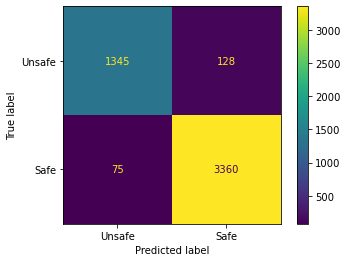

In [390]:
model_predict=dt_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Pipeline 1.2

One Hot Encoding > Decision Tree > Grid Search > Final Model

In [391]:
dt_v2 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                        ('decisiontree', dtree)])

In [392]:
dt_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('decisiontree',
                 DecisionTreeClassifier(max_depth=50, random_state=42))])

In [393]:
from sklearn import set_config
set_config(display='diagram') 
dt_v2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('decisiontree',
                 DecisionTreeClassifier(max_depth=50, random_state=42))])

Grid Search

In [394]:
dt_params = { "decisiontree__max_depth":[5,7,8,10,12,14],
                  "decisiontree__criterion":['gini','entropy'],
             "decisiontree__min_samples_leaf":[1,2],
             "decisiontree__min_samples_split":[5,10]
                  }

In [395]:
dt_grid_v2 = GridSearchCV(dt_v2,
                           param_grid=dt_params,
                           cv = 5,
                           scoring = scorer)

In [396]:
dt_grid_v2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('decisiontree',
                                        DecisionTreeClassifier(max_depth=50,
                                                               random_state=42))]),
             param_grid={'decisiontree__criterion': ['gini', 'entropy'],
                         'decisiontree__max_depth': [5, 7, 8, 10, 12, 14],
                         'decisiontree__min_samples_leaf': [1, 2],
                         'decisiontree__min_samples_split': [5, 10]},
             scoring=make_scorer(accuracy_score))

In [397]:
dt_grid_v2.best_params_

{'decisiontree__criterion': 'entropy',
 'decisiontree__max_depth': 14,
 'decisiontree__min_samples_leaf': 1,
 'decisiontree__min_samples_split': 5}

In [398]:
dt_grid_v2.best_score_

0.9638684072119288

In [399]:
dt_grid_results = pd.DataFrame( dt_grid_v2.cv_results_ )
dt_grid_results[['param_decisiontree__criterion','param_decisiontree__max_depth', 'mean_test_score', 'std_test_score']]

,param_decisiontree__criterion,param_decisiontree__max_depth,mean_test_score,std_test_score
0,gini,5,0.862334,0.005504
1,gini,5,0.862334,0.005504
2,gini,5,0.862334,0.005504
3,gini,5,0.862334,0.005504
4,gini,7,0.886240,0.003525
5,gini,7,0.886240,0.003525
6,gini,7,0.886240,0.003525
7,gini,7,0.886240,0.003525
8,gini,8,0.893847,0.005192
9,gini,8,0.893847,0.005192


Building the final Decision Tree Model

In [400]:
final_model_dt = DecisionTreeClassifier(max_depth=dt_grid_v2.best_params_['decisiontree__max_depth'],
                                criterion=dt_grid_v2.best_params_['decisiontree__criterion'],
                                        min_samples_leaf=dt_grid_v2.best_params_['decisiontree__min_samples_leaf'],
                                  min_samples_split= dt_grid_v2.best_params_['decisiontree__min_samples_split'] 
                                )

dt_final = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('decisiontree', final_model_dt)])

In [401]:
dt_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('decisiontree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=14,
                                        min_samples_split=5))])

In [402]:
dt_final.score(X_test, y_test)

0.960676446617767

In [403]:
from sklearn.metrics import mean_squared_error

In [404]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, dt_final.predict(X_test)))
final_rmse_dt

0.19830167266625132

In [405]:
y_pred=dt_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [406]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.960676446617767
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3435
           1       0.97      0.90      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



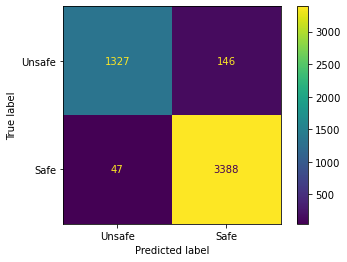

In [408]:
model_predict=dt_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Pipeline 1.3

Target Encoding > Decision Tree > Grid Search > Final Model

In [409]:
dt_v3 = Pipeline(steps=[('preprocessor', preprocessor_target),
                        ('decisiontree', dtree)])

In [410]:
dt_v3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('decisiontree',
                 DecisionTreeClassifier(max_depth=50, random_state=42))])

In [411]:
from sklearn import set_config
set_config(display='diagram') 
dt_v3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('decisiontree',
                 DecisionTreeClassifier(max_depth=50, random_state=42))])

Grid Search

In [412]:
from sklearn.model_selection import GridSearchCV

In [413]:
dt_params = { "decisiontree__max_depth":[5,7,8,10,12,14],
                  "decisiontree__criterion":['gini','entropy'],
             "decisiontree__min_samples_leaf":[1,2],
             "decisiontree__min_samples_split":[5,10]
                  }

In [414]:
dt_grid_v3 = GridSearchCV(dt_v3,
                           param_grid=dt_params,
                           cv = 5,
                           scoring = scorer)

In [415]:
dt_grid_v3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_target',
                                                                         Pipeline(steps=[('tencoder',
                                                                                          TargetEncoder())]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('decisiontree',
                                        DecisionTreeClassifier(max_depth=50,
                                                               random_state=42))]),
             param_grid={'decisiontree__criterion': ['gini', 'entropy'],
                         'decisiontree__max_depth': [5, 7, 8, 10, 12, 14],
                         'decisiontree__min_samples_leaf': [1, 2],
                         'decisiontree__min_samples_split': [5, 10]},
             scoring=make_scorer(accuracy_score))

In [416]:
dt_grid_v3.best_params_

{'decisiontree__criterion': 'gini',
 'decisiontree__max_depth': 12,
 'decisiontree__min_samples_leaf': 1,
 'decisiontree__min_samples_split': 5}

In [417]:
dt_grid_v3.best_score_

0.9627138157894738

In [418]:
dt_grid_results = pd.DataFrame( dt_grid_v3.cv_results_ )
dt_grid_results[['param_decisiontree__criterion','param_decisiontree__max_depth', 'mean_test_score', 'std_test_score']]

,param_decisiontree__criterion,param_decisiontree__max_depth,mean_test_score,std_test_score
0,gini,5,0.943290,0.005502
1,gini,5,0.943290,0.005502
2,gini,5,0.943290,0.005502
3,gini,5,0.943290,0.005502
4,gini,7,0.957145,0.005524
5,gini,7,0.957145,0.005524
6,gini,7,0.957145,0.005524
7,gini,7,0.957145,0.005524
8,gini,8,0.960201,0.004117
9,gini,8,0.960201,0.004117


Building the final Decision Tree Model

In [419]:
final_model_dt = DecisionTreeClassifier(max_depth=dt_grid_v3.best_params_['decisiontree__max_depth'],
                                criterion=dt_grid_v3.best_params_['decisiontree__criterion'],
                                        min_samples_leaf=dt_grid_v3.best_params_['decisiontree__min_samples_leaf'],
                                  min_samples_split= dt_grid_v3.best_params_['decisiontree__min_samples_split'] 
                                )

dt_final = Pipeline(steps=[('preprocessor', preprocessor_target),
                          ('decisiontree', final_model_dt)])

In [420]:
dt_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('decisiontree',
                 DecisionTreeClassifier(max_depth=12, min_samples_split=5))])

In [421]:
dt_final.score(X_test, y_test)

0.9602689486552567

In [422]:
from sklearn.metrics import mean_squared_error

In [423]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, dt_final.predict(X_test)))
final_rmse_dt

0.1993264943371635

In [424]:
y_pred=dt_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [425]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.9602689486552567
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3435
           1       0.97      0.90      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



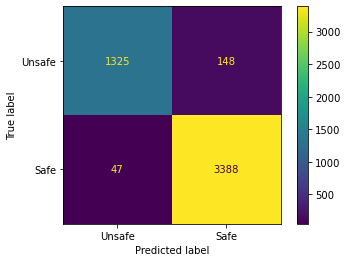

In [426]:
model_predict=dt_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

#### Conclusion for Decision Tree Classifier:
The highest accuracy (96.06%) is achieved for model 2, i.e.

OneHot Encoding > Decision Tree > Grid Search > Final Model

## Random Forest Experiments

### Pipeline 2.1

Oversampling > One Hot Encoding > Random Forest > Grid Search > Final Model

In [427]:
rf_v1 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                        ('randomforest', rf)])

In [428]:
rf_v1.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('randomforest',
                 RandomForestClassifier(criterion='entropy', random_state=42))])

Grid Search

In [429]:
rf_params = { "randomforest__max_depth":[5,8,10,12,14],
             "randomforest__criterion":['gini','entropy'],
             "randomforest__n_estimators":[10,20,50,100]
                  }

In [430]:
rf_grid_v1 = GridSearchCV(rf_v1,
                           param_grid=rf_params,
                           cv = 5,
                           scoring = scorer)

In [431]:
rf_grid_v1.fit(X_oversampled_train, y_oversampled_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('randomforest',
                                        RandomForestClassifier(criterion='entropy',
                                                               random_state=42))]),
             param_grid={'randomforest__criterion': ['gini', 'entropy'],
                         'randomforest__max_depth': [5, 8, 10, 12, 14],
                         'randomforest__n_estimators': [10, 20, 50, 100]},
             scoring=make_scorer(accuracy_score))

In [432]:
rf_grid_v1.best_params_

{'randomforest__criterion': 'gini',
 'randomforest__max_depth': 14,
 'randomforest__n_estimators': 100}

In [433]:
rf_grid_v1.best_score_

0.9431422698938411

In [434]:
rf_grid_results = pd.DataFrame( rf_grid_v1.cv_results_ )
rf_grid_results[['param_randomforest__criterion','param_randomforest__max_depth', 'mean_test_score', 'std_test_score']]

,param_randomforest__criterion,param_randomforest__max_depth,mean_test_score,std_test_score
0,gini,5,0.913436,0.001419
1,gini,5,0.911507,0.002378
2,gini,5,0.927421,0.003707
3,gini,5,0.926698,0.002130
4,gini,8,0.928771,0.004198
5,gini,8,0.928723,0.005458
6,gini,8,0.935282,0.004118
7,gini,8,0.933883,0.004257
8,gini,10,0.934558,0.004148
9,gini,10,0.934558,0.003655


Building the final Random Forest Model

In [435]:
final_model_rf = RandomForestClassifier(n_estimators = rf_grid_v1.best_params_['randomforest__n_estimators'], 
                       criterion = rf_grid_v1.best_params_['randomforest__criterion'], 
                       max_depth = rf_grid_v1.best_params_['randomforest__max_depth']
                      )

rf_final = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('randomforest', final_model_rf)])

In [436]:
rf_final.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('randomforest', RandomForestClassifier(max_depth=14))])

In [437]:
rf_final.score(X_test, y_test)

0.9590464547677262

In [438]:
from sklearn.metrics import mean_squared_error

In [439]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, rf_final.predict(X_test)))
final_rmse_dt

0.20236982292889877

In [440]:
y_pred=rf_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [441]:
rf_final.score(X_test,y_test)

0.9590464547677262

In [442]:
rf_final.score(X_train,y_train)

0.9623064384678076

In [443]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.9590464547677262
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3435
           1       0.98      0.89      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



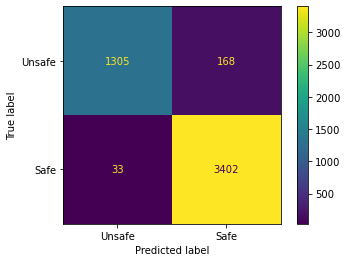

In [444]:
model_predict=rf_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Pipeline 2.2

One Hot Encoding > Random Forest > Grid Search > Final Model

In [445]:
rf_v2 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                        ('randomforest', rf)])

In [446]:
rf_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('randomforest',
                 RandomForestClassifier(criterion='entropy', random_state=42))])

Grid Search

In [447]:
from sklearn.model_selection import GridSearchCV

In [448]:
rf_params = { "randomforest__max_depth":[5,8,10,12,14],
             "randomforest__criterion":['gini','entropy'],
             "randomforest__n_estimators":[10,20,50,100]
                  }

In [449]:
rf_grid_v2 = GridSearchCV(rf_v2,
                           param_grid=rf_params,
                           cv = 5,
                           scoring = scorer)

In [450]:
rf_grid_v2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('randomforest',
                                        RandomForestClassifier(criterion='entropy',
                                                               random_state=42))]),
             param_grid={'randomforest__criterion': ['gini', 'entropy'],
                         'randomforest__max_depth': [5, 8, 10, 12, 14],
                         'randomforest__n_estimators': [10, 20, 50, 100]},
             scoring=make_scorer(accuracy_score))

In [451]:
rf_grid_v2.best_params_

{'randomforest__criterion': 'entropy',
 'randomforest__max_depth': 14,
 'randomforest__n_estimators': 100}

In [452]:
rf_grid_v1.best_score_

0.9431422698938411

In [453]:
rf_grid_results = pd.DataFrame( rf_grid_v1.cv_results_ )
rf_grid_results[['param_randomforest__criterion','param_randomforest__max_depth', 'mean_test_score', 'std_test_score']]

,param_randomforest__criterion,param_randomforest__max_depth,mean_test_score,std_test_score
0,gini,5,0.913436,0.001419
1,gini,5,0.911507,0.002378
2,gini,5,0.927421,0.003707
3,gini,5,0.926698,0.002130
4,gini,8,0.928771,0.004198
5,gini,8,0.928723,0.005458
6,gini,8,0.935282,0.004118
7,gini,8,0.933883,0.004257
8,gini,10,0.934558,0.004148
9,gini,10,0.934558,0.003655


Building the final Random Forest Model

In [454]:
final_model_rf = RandomForestClassifier(n_estimators = rf_grid_v2.best_params_['randomforest__n_estimators'], 
                       criterion = rf_grid_v2.best_params_['randomforest__criterion'], 
                       max_depth = rf_grid_v2.best_params_['randomforest__max_depth']
                      )

rf_final = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('randomforest', final_model_rf)])

In [455]:
rf_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('randomforest',
                 RandomForestClassifier(criterion='entropy', max_depth=14))])

In [456]:
rf_final.score(X_test, y_test)

0.9372453137734311

In [457]:
from sklearn.metrics import mean_squared_error

In [458]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, rf_final.predict(X_test)))
final_rmse_dt

0.250508854587156

In [459]:
y_pred=rf_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [460]:
rf_final.score(X_test,y_test)

0.9372453137734311

In [461]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.9372453137734311
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      3435
           1       0.98      0.80      0.88      1473

    accuracy                           0.94      4908
   macro avg       0.95      0.90      0.92      4908
weighted avg       0.94      0.94      0.94      4908



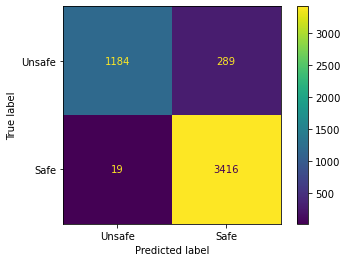

In [462]:
model_predict=rf_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Pipeline 2.3

Target Encoding > Random Forest > Grid Search > Final Model

In [463]:
rf_v3 = Pipeline(steps=[('preprocessor', preprocessor_target),
                        ('randomforest', rf)])

In [464]:
rf_v3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('randomforest',
                 RandomForestClassifier(criterion='entropy', random_state=42))])

Grid Search

In [465]:
rf_params = { "randomforest__max_depth":[5,8,10,12,14],
             "randomforest__criterion":['gini','entropy'],
             "randomforest__n_estimators":[10,20,50,100]
                  }

In [466]:
rf_grid_v3 = GridSearchCV(rf_v3,
                           param_grid=rf_params,
                           cv = 5,
                           scoring = scorer)

In [467]:
rf_grid_v3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_target',
                                                                         Pipeline(steps=[('tencoder',
                                                                                          TargetEncoder())]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('randomforest',
                                        RandomForestClassifier(criterion='entropy',
                                                               random_state=42))]),
             param_grid={'randomforest__criterion': ['gini', 'entropy'],
                         'randomforest__max_depth': [5, 8, 10, 12, 14],
                         'randomforest__n_estimators': [10, 20, 50, 100]},
             scoring=make_scorer(accuracy_score))

In [468]:
rf_grid_v3.best_params_

{'randomforest__criterion': 'gini',
 'randomforest__max_depth': 10,
 'randomforest__n_estimators': 100}

In [469]:
rf_grid_v1.best_score_

0.9431422698938411

In [470]:
rf_grid_results = pd.DataFrame( rf_grid_v1.cv_results_ )
rf_grid_results[['param_randomforest__criterion','param_randomforest__max_depth', 'mean_test_score', 'std_test_score']]

,param_randomforest__criterion,param_randomforest__max_depth,mean_test_score,std_test_score
0,gini,5,0.913436,0.001419
1,gini,5,0.911507,0.002378
2,gini,5,0.927421,0.003707
3,gini,5,0.926698,0.002130
4,gini,8,0.928771,0.004198
5,gini,8,0.928723,0.005458
6,gini,8,0.935282,0.004118
7,gini,8,0.933883,0.004257
8,gini,10,0.934558,0.004148
9,gini,10,0.934558,0.003655


Building the final Random Forest Model

In [471]:
final_model_rf = RandomForestClassifier(n_estimators = rf_grid_v3.best_params_['randomforest__n_estimators'], 
                       criterion = rf_grid_v3.best_params_['randomforest__criterion'], 
                       max_depth = rf_grid_v3.best_params_['randomforest__max_depth']
                      )

rf_final = Pipeline(steps=[('preprocessor', preprocessor_target),
                          ('randomforest', final_model_rf)])

In [472]:
rf_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('randomforest', RandomForestClassifier(max_depth=10))])

In [473]:
rf_final.score(X_test, y_test)

0.9602689486552567

In [474]:
from sklearn.metrics import mean_squared_error

In [475]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, rf_final.predict(X_test)))
final_rmse_dt

0.1993264943371635

In [476]:
y_pred=rf_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [477]:
rf_final.score(X_test,y_test)

0.9602689486552567

In [478]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.9602689486552567
[[3386   49]
 [ 146 1327]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3435
           1       0.96      0.90      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



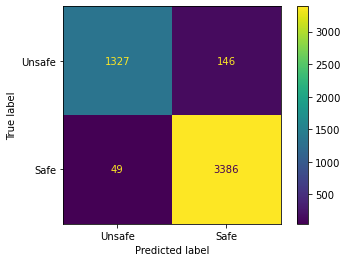

In [479]:
model_predict=rf_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

#### Conclusion for Random Forest Classifier:
The highest accuracy (96.02%) is achieved for model 3, i.e.

Target Encoding > Random Forest > Grid Search > Final Model

## Gradient Boost Experimentss

### Pipeline 3.1

Oversampling > One Hot Encoding > Gradient Boost > Grid Search > Final Model

In [888]:
gb_v1 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                        ('gradientboost', grad_class)])

In [889]:
gb_v1.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('gradientboost',
                 GradientBoostingClassifier(n_estimators=10, random_state=42))])

Grid Search

In [890]:
gb_params = { "gradientboost__learning_rate":[0.9,0.5,0.1],
              "gradientboost__n_estimators":[50,100]}

In [891]:
gb_grid_v1 = GridSearchCV(gb_v1,
                           param_grid=gb_params,
                           cv = 5,
                           scoring = scorer)

In [892]:
gb_grid_v1.fit(X_oversampled_train, y_oversampled_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('gradientboost',
                                        GradientBoostingClassifier(n_estimators=10,
                                                                   random_state=42))]),
             param_grid={'gradientboost__learning_rate': [0.9, 0.5, 0.1],
                         'gradientboost__n_estimators': [50, 100]},
             scoring=make_scorer(accuracy_score))

In [893]:
gb_grid_v1.best_params_

{'gradientboost__learning_rate': 0.1, 'gradientboost__n_estimators': 100}

In [894]:
gb_grid_v1.best_score_

0.9500385425766996

In [895]:
gb_grid_results = pd.DataFrame( gb_grid_v1.cv_results_ )
gb_grid_results[['param_gradientboost__learning_rate','param_gradientboost__n_estimators', 'mean_test_score', 'std_test_score']]

,param_gradientboost__learning_rate,param_gradientboost__n_estimators,mean_test_score,std_test_score
0,0.9,50,0.948833,0.003828
1,0.9,100,0.948254,0.004578
2,0.5,50,0.949315,0.003340
3,0.5,100,0.949990,0.003358
4,0.1,50,0.944252,0.003624
5,0.1,100,0.950039,0.003787


Building the final Gradient Boost Model

In [896]:
final_model_gb = GradientBoostingClassifier(n_estimators=gb_grid_v1.best_params_['gradientboost__n_estimators'], 
                                learning_rate=gb_grid_v1.best_params_['gradientboost__learning_rate'])

gb_final1 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('gradientBoost', final_model_gb)])

In [897]:
gb_final1.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('gradientBoost', GradientBoostingClassifier())])

In [898]:
gb_final1.score(X_test, y_test)

0.960880195599022

In [899]:
from sklearn.metrics import mean_squared_error

In [900]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, gb_final1.predict(X_test)))
final_rmse_dt

0.1977872705736595

In [901]:
y_pred=gb_final1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [940]:
final_score = gb_final1.score(X_test,y_test)
final_score

0.960880195599022

In [903]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.960880195599022
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3435
           1       0.97      0.90      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



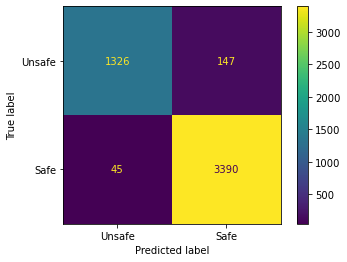

In [904]:
model_predict=gb_final1.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Pipeline 3.2

One Hot Encoding > Gradient Boost > Grid Search > Final Model

In [842]:
gb_v2 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                        ('gradientboost', grad_class)])

In [843]:
gb_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('gradientboost',
                 GradientBoostingClassifier(n_estimators=10, random_state=42))])

Grid Search

In [844]:
from sklearn.model_selection import GridSearchCV

In [845]:
gb_params = { "gradientboost__learning_rate":[0.9,0.5,0.1],
              "gradientboost__n_estimators":[50,100]}

In [846]:
gb_grid_v2 = GridSearchCV(gb_v2,
                           param_grid=gb_params,
                           cv = 5,
                           scoring = scorer)

In [847]:
gb_grid_v2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('gradientboost',
                                        GradientBoostingClassifier(n_estimators=10,
                                                                   random_state=42))]),
             param_grid={'gradientboost__learning_rate': [0.9, 0.5, 0.1],
                         'gradientboost__n_estimators': [50, 100]},
             scoring=make_scorer(accuracy_score))

In [848]:
gb_grid_v2.best_params_

{'gradientboost__learning_rate': 0.5, 'gradientboost__n_estimators': 100}

In [849]:
gb_grid_v2.best_score_

0.9629176662729755

In [850]:
gb_grid_results = pd.DataFrame( gb_grid_v1.cv_results_ )
gb_grid_results[['param_gradientboost__learning_rate','param_gradientboost__n_estimators', 'mean_test_score', 'std_test_score']]

,param_gradientboost__learning_rate,param_gradientboost__n_estimators,mean_test_score,std_test_score
0,0.9,50,0.948833,0.003828
1,0.9,100,0.948254,0.004578
2,0.5,50,0.949315,0.003340
3,0.5,100,0.949990,0.003358
4,0.1,50,0.944252,0.003624
5,0.1,100,0.950039,0.003787


Building the final Gradient Boost Model

In [851]:
final_model_gb = GradientBoostingClassifier(n_estimators=gb_grid_v2.best_params_['gradientboost__n_estimators'], 
                                learning_rate=gb_grid_v2.best_params_['gradientboost__learning_rate'])

gb_final2 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('randomforest', final_model_gb)])

In [852]:
gb_final2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('randomforest',
                 GradientBoostingClassifier(learning_rate=0.5))])

In [853]:
gb_final2.score(X_test, y_test)

0.960676446617767

In [854]:
from sklearn.metrics import mean_squared_error

In [855]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, gb_final2.predict(X_test)))
final_rmse_dt

0.19830167266625132

In [856]:
y_pred=gb_final2.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [857]:
gb_final2.score(X_test,y_test)

0.960676446617767

In [858]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.960676446617767
[[3388   47]
 [ 146 1327]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3435
           1       0.97      0.90      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



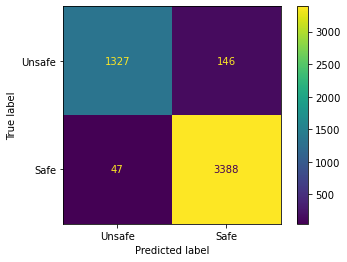

In [859]:
model_predict=gb_final2.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Pipeline 3.3

Target Encoding > Gradient Boost > Grid Search > Final Model

In [860]:
gb_v3 = Pipeline(steps=[('preprocessor', preprocessor_target),
                        ('gradientboost', grad_class)])

In [861]:
gb_v3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('gradientboost',
                 GradientBoostingClassifier(n_estimators=10, random_state=42))])

Grid Search

In [862]:
from sklearn.model_selection import GridSearchCV

In [863]:
gb_params = { "gradientboost__learning_rate":[0.9,0.5,0.1],
              "gradientboost__n_estimators":[50,100]}

In [864]:
gb_grid_v3 = GridSearchCV(gb_v3,
                           param_grid=gb_params,
                           cv = 5,
                           scoring = scorer)

In [865]:
gb_grid_v3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_target',
                                                                         Pipeline(steps=[('tencoder',
                                                                                          TargetEncoder())]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('gradientboost',
                                        GradientBoostingClassifier(n_estimators=10,
                                                                   random_state=42))]),
             param_grid={'gradientboost__learning_rate': [0.9, 0.5, 0.1],
                         'gradientboost__n_estimators': [50, 100]},
             scoring=make_scorer(accuracy_score))

In [866]:
gb_grid_v3.best_params_

{'gradientboost__learning_rate': 0.5, 'gradientboost__n_estimators': 100}

In [867]:
gb_grid_v3.best_score_

0.9634608446519524

In [868]:
gb_grid_results = pd.DataFrame( gb_grid_v1.cv_results_ )
gb_grid_results[['param_gradientboost__learning_rate','param_gradientboost__n_estimators', 'mean_test_score', 'std_test_score']]

,param_gradientboost__learning_rate,param_gradientboost__n_estimators,mean_test_score,std_test_score
0,0.9,50,0.948833,0.003828
1,0.9,100,0.948254,0.004578
2,0.5,50,0.949315,0.003340
3,0.5,100,0.949990,0.003358
4,0.1,50,0.944252,0.003624
5,0.1,100,0.950039,0.003787


Building the final Gradient Boost Model

In [869]:
final_model_gb = GradientBoostingClassifier(n_estimators=gb_grid_v3.best_params_['gradientboost__n_estimators'], 
                                learning_rate=gb_grid_v3.best_params_['gradientboost__learning_rate'])

gb_final3 = Pipeline(steps=[('preprocessor', preprocessor_target),
                          ('gradientboost', final_model_gb)])

In [870]:
gb_final3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('gradientboost',
                 GradientBoostingClassifier(learning_rate=0.5))])

In [871]:
gb_final3.score(X_test, y_test)

0.960676446617767

In [872]:
from sklearn.metrics import mean_squared_error

In [873]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, gb_final3.predict(X_test)))
final_rmse_dt

0.19830167266625132

In [874]:
y_pred=gb_final3.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [875]:
gb_final3.score(X_test,y_test)

0.960676446617767

In [876]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.960676446617767
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3435
           1       0.96      0.90      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



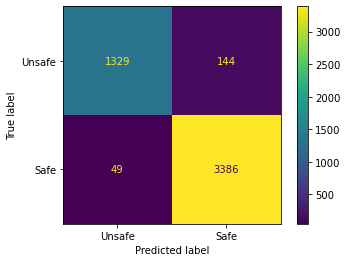

In [877]:
model_predict=gb_final3.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

#### Conclusion for Gradient Boost Classifier:
The highest accuracy (96.08%) is achieved for model 1, i.e.

Oversampling > OneHot Encoding > Gradient Boost > Grid Search > Final Model

## KNN Experiments

### Pipeline 4.1

Oversampling > One Hot Encoding > KNN > Grid Search > Final Model

In [669]:
knn_v1 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                        ('knn', knn)])

In [670]:
knn_v1.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

Grid Search

In [671]:
from sklearn.model_selection import GridSearchCV

In [672]:
knn_params = { "knn__n_neighbors": [5, 10, 15, 20, 25],
               "knn__weights": ['uniform', 'distance'],
               "knn__metric": ['minkowski', 'euclidean']}

In [673]:
knn_grid_v1 = GridSearchCV(knn_v1,
                           param_grid=knn_params,
                           cv = 10,
                           scoring = scorer,
                           )

In [674]:
knn_grid_v1.fit(X_oversampled_train, y_oversampled_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=10))]),
             param_grid={'knn__metric': ['minkowski', 'euclidean'],
                         'knn__n_neighbors': [5, 10, 15, 20, 25],
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(accuracy_score))

In [675]:
knn_grid_v1.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 25, 'knn__weights': 'uniform'}

In [676]:
knn_grid_results = pd.DataFrame( knn_grid_v1.cv_results_ )
knn_grid_results[['param_knn__n_neighbors', 'param_knn__weights', 'mean_test_score', 'std_test_score']]

,param_knn__n_neighbors,param_knn__weights,mean_test_score,std_test_score
0,5,uniform,0.947097,0.004529
1,5,distance,0.947290,0.004570
2,10,uniform,0.949557,0.005225
3,10,distance,0.949412,0.005155
4,15,uniform,0.951052,0.005084
5,15,distance,0.950570,0.005382
6,20,uniform,0.951148,0.004840
7,20,distance,0.950570,0.005108
8,25,uniform,0.951486,0.004568
9,25,distance,0.950811,0.005188


Building the final KNN Model

In [677]:
final_model_knn = KNeighborsClassifier(n_neighbors = knn_grid_v1.best_params_['knn__n_neighbors'], 
                                  weights = knn_grid_v1.best_params_['knn__weights'], 
                                  metric = knn_grid_v1.best_params_['knn__metric'])
knn_final = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('knn', final_model_knn)])

In [678]:
knn_final.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('knn', KNeighborsClassifier(n_neighbors=25))])

In [679]:
knn_final.score(X_test, y_test)

0.956601466992665

In [680]:
from sklearn.metrics import mean_squared_error

In [681]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, knn_final.predict(X_test)))
final_rmse_dt

0.2083231456351765

In [682]:
y_pred=knn_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [683]:
knn_final.score(X_test,y_test)

0.956601466992665

In [684]:
knn_final.score(X_train,y_train)

0.9626460201032329

In [685]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.956601466992665
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3435
           1       0.94      0.91      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.95      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



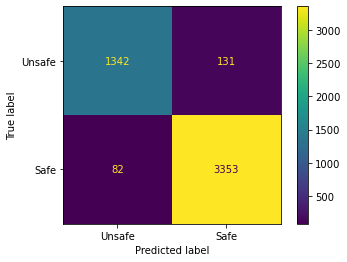

In [686]:
model_predict=knn_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Pipeline 4.2

One Hot Encoding > KNN > Grid Search > Final Model

In [687]:
knn_v2 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                        ('knn', knn)])

In [688]:
knn_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

Grid Search

In [689]:
from sklearn.model_selection import GridSearchCV

In [690]:
knn_params = { "knn__n_neighbors": [5, 10, 15, 20, 25],
               "knn__weights": ['uniform', 'distance'],
               "knn__metric": ['minkowski', 'euclidean']}

In [691]:
knn_grid_v2 = GridSearchCV(knn_v2,
                           param_grid=knn_params,
                           cv = 10,
                           scoring = scorer)

In [692]:
knn_grid_v2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=10))]),
             param_grid={'knn__metric': ['minkowski', 'euclidean'],
                         'knn__n_neighbors': [5, 10, 15, 20, 25],
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(accuracy_score))

In [693]:
knn_grid_v2.best_params_

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 25,
 'knn__weights': 'distance'}

In [694]:
knn_grid_v2.best_score_

0.9631205448065174

In [695]:
knn_grid_results = pd.DataFrame( knn_grid_v2.cv_results_ )
knn_grid_results[['param_knn__n_neighbors', 'param_knn__weights', 'mean_test_score', 'std_test_score']]

,param_knn__n_neighbors,param_knn__weights,mean_test_score,std_test_score
0,5,uniform,0.956872,0.006683
1,5,distance,0.957076,0.006590
2,10,uniform,0.960539,0.005247
3,10,distance,0.960811,0.005365
4,15,uniform,0.963120,0.005225
5,15,distance,0.962849,0.004887
6,20,uniform,0.962305,0.005636
7,20,distance,0.962577,0.004786
8,25,uniform,0.962102,0.004893
9,25,distance,0.963121,0.004594


Building the final KNN Model

In [696]:
final_model_knn = KNeighborsClassifier(n_neighbors = knn_grid_v2.best_params_['knn__n_neighbors'], 
                                  weights = knn_grid_v2.best_params_['knn__weights'], 
                                  metric = knn_grid_v2.best_params_['knn__metric'])
knn_final = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('knn', final_model_knn)])

In [697]:
knn_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=25, weights='distance'))])

In [698]:
knn_final.score(X_test, y_test)

0.9602689486552567

In [699]:
from sklearn.metrics import mean_squared_error

In [700]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, knn_final.predict(X_test)))
final_rmse_dt

0.1993264943371635

In [701]:
y_pred=knn_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [702]:
knn_final.score(X_test,y_test)

0.9602689486552567

In [703]:
knn_final.score(X_train,y_train)

0.9650230915512089

In [704]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.9602689486552567
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3435
           1       0.97      0.90      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



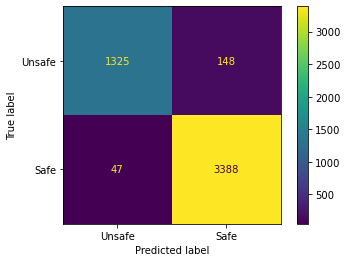

In [705]:
model_predict=knn_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Pipeline 4.3

Target Encoding > KNN > Grid Search > Final Model

In [706]:
knn_v3 = Pipeline(steps=[('preprocessor', preprocessor_target),
                        ('knn', knn)])

In [707]:
knn_v3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

Grid Search

In [708]:
from sklearn.model_selection import GridSearchCV

In [709]:
knn_params = { "knn__n_neighbors": [5, 10, 15, 20, 25],
               "knn__weights": ['uniform', 'distance'],
               "knn__metric": ['minkowski', 'euclidean']}

In [710]:
knn_grid_v3 = GridSearchCV(knn_v3,
                           param_grid=knn_params,
                           cv = 10,
                           scoring = 'precision',
                           refit=True ,
                           n_jobs = -1)

In [711]:
knn_grid_v3.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_target',
                                                                         Pipeline(steps=[('tencoder',
                                                                                          TargetEncoder())]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=10))]),
             n_jobs=-1,
             param_grid={'knn__metric': ['minkowski', 'euclidean'],
                         'knn__n_neighbors': [5, 10, 15, 20, 25],
                         'knn__weights': ['uniform', 'distance']},
             scoring='precision')

In [712]:
knn_grid_v3.best_params_

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 10,
 'knn__weights': 'distance'}

In [713]:
knn_grid_v3.best_score_

0.9735133205956814

In [714]:
knn_grid_results = pd.DataFrame( knn_grid_v3.cv_results_ )
knn_grid_results[['param_knn__n_neighbors', 'param_knn__weights', 'mean_test_score', 'std_test_score']]

,param_knn__n_neighbors,param_knn__weights,mean_test_score,std_test_score
0,5,uniform,0.959965,0.013243
1,5,distance,0.960424,0.012950
2,10,uniform,0.972530,0.005698
3,10,distance,0.973513,0.005948
4,15,uniform,0.964582,0.006279
5,15,distance,0.971408,0.005665
6,20,uniform,0.964148,0.008313
7,20,distance,0.970484,0.007086
8,25,uniform,0.957684,0.011775
9,25,distance,0.970484,0.007086


Building the final KNN Model

In [715]:
final_model_knn = KNeighborsClassifier(n_neighbors = knn_grid_v3.best_params_['knn__n_neighbors'], 
                                  weights = knn_grid_v3.best_params_['knn__weights'], 
                                  metric = knn_grid_v3.best_params_['knn__metric'])
knn_final = Pipeline(steps=[('preprocessor', preprocessor_target),
                          ('knn', final_model_knn)])

In [716]:
knn_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=10, weights='distance'))])

In [717]:
knn_final.score(X_test, y_test)

0.960676446617767

In [718]:
from sklearn.metrics import mean_squared_error

In [719]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, knn_final.predict(X_test)))
final_rmse_dt

0.19830167266625132

In [720]:
y_pred=knn_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [721]:
knn_final.score(X_test,y_test)

0.960676446617767

In [722]:
knn_final.score(X_train,y_train)

0.9650230915512089

In [723]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.960676446617767
[[3388   47]
 [ 146 1327]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3435
           1       0.97      0.90      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



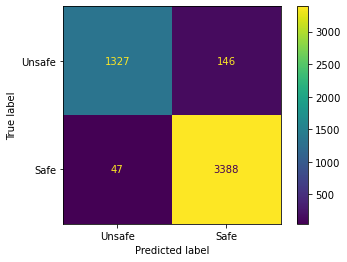

In [724]:
model_predict=knn_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

#### Conclusion for KNN Classifier:
The highest accuracy (96.06%) is achieved for model 3, i.e.

Target Encoding > KNN > Grid Search > Final Model

## XGBoost Experiments

### Pipeline 5.1

Oversampling > One Hot Encoding > XGBoost > Grid Search > Final Model

In [590]:
xgb_v1 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                        ('xgb', xgb)])

In [591]:
xgb_v1.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, enable_ca...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=400,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.75,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])

Grid Search

In [592]:
xgb_params = { "xgb__n_estimators": [100,200,300,400,500],
               "xgb__max_depth": [3,4,5,6,7],
              #"objective": 'reg:squarederror',
               "xgb__colsample_bytree": [0.5,0.6,7],
               "xgb__subsample": [0.75,0.7]
              #"lambda": 100
           }

In [593]:
xgb_grid_v1 = GridSearchCV(xgb_v1,
                           param_grid=xgb_params,
                           cv = 5,
                           scoring = scorer)

In [594]:
xgb_grid_v1.fit(X_oversampled_train, y_oversampled_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      co...
                                                      num_parallel_tree=1,
                                                      predictor='auto',
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=1,
                                                      subsample=0.75,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=0))]),
             param_grid={'xgb__colsample_bytree': [0.5, 0.6, 7],
                         'xgb__max_depth': [3, 4, 5, 6, 7],
                         'xgb__n_estimators': [100, 200, 300, 400, 500],
                         'xgb__subsample': [0.75, 0.7]},
             scoring=make_scorer(accuracy_score))

In [595]:
xgb_grid_v1.best_params_

{'xgb__colsample_bytree': 0.6,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 100,
 'xgb__subsample': 0.7}

In [596]:
xgb_grid_v1.best_score_

0.9515817571182849

In [597]:
xgb_grid_results = pd.DataFrame( xgb_grid_v1.cv_results_ )
#xgb_grid_results[['mean_fit_time','mean_score_time','params']

In [598]:
xgb_grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb__colsample_bytree,param_xgb__max_depth,param_xgb__n_estimators,param_xgb__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.057906,0.035263,0.036141,0.002711,0.5,3,100,0.75,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth...",0.952025,0.945744,0.949120,0.952737,0.956354,0.951196,0.003569,9
1,1.043346,0.020827,0.038490,0.002904,0.5,3,100,0.7,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth...",0.951302,0.945503,0.948638,0.953219,0.957077,0.951148,0.003941,10
2,1.965008,0.026175,0.027484,0.003308,0.5,3,200,0.75,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth...",0.950579,0.945503,0.950567,0.951290,0.955389,0.950666,0.003143,48
3,1.991378,0.016226,0.031277,0.004699,0.5,3,200,0.7,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth...",0.951784,0.945985,0.952014,0.951290,0.955389,0.951292,0.003024,2
4,2.897959,0.030725,0.033764,0.006245,0.5,3,300,0.75,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth...",0.951302,0.944779,0.951772,0.949843,0.954666,0.950473,0.003249,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.087099,0.000966,0.000000,0.000000,7,7,300,0.7,"{'xgb__colsample_bytree': 7, 'xgb__max_depth':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,120
146,0.085029,0.005928,0.000000,0.000000,7,7,400,0.75,"{'xgb__colsample_bytree': 7, 'xgb__max_depth':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,111
147,0.080819,0.007055,0.000000,0.000000,7,7,400,0.7,"{'xgb__colsample_bytree': 7, 'xgb__max_depth':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,122
148,0.080512,0.003575,0.000000,0.000000,7,7,500,0.75,"{'xgb__colsample_bytree': 7, 'xgb__max_depth':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,127


Building the final XGBoost Model

In [599]:
final_model_xgb = XGBClassifier(n_estimators = xgb_grid_v1.best_params_['xgb__n_estimators'], 
                                      max_depth = xgb_grid_v1.best_params_['xgb__max_depth'],
                                      colsample_bytree = xgb_grid_v1.best_params_['xgb__colsample_bytree'],
                                      subsample = xgb_grid_v1.best_params_['xgb__subsample'])
                                       
xgb_final = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('XGBoost', final_model_xgb)])

In [600]:
xgb_final.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.6, enabl...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=3, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.7,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [601]:
xgb_final.score(X_test, y_test)

0.958842705786471

In [602]:
from sklearn.metrics import mean_squared_error

In [603]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, xgb_final.predict(X_test)))
final_rmse_dt

0.20287260587257447

In [604]:
y_pred=xgb_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [605]:
xgb_final.score(X_test,y_test)

0.958842705786471

In [606]:
xgb_final.score(X_train,y_train)

0.9639364303178484

In [607]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.958842705786471
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3435
           1       0.95      0.91      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



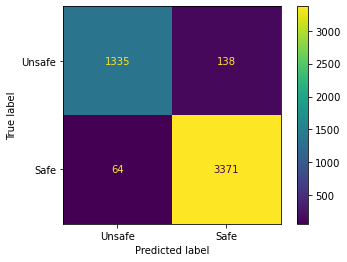

In [608]:
model_predict=xgb_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Pipeline 5.2

One Hot Encoding > XGBoost > Grid Search > Final Model

In [609]:
xgb_v2 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                        ('xgb', xgb)])

In [610]:
xgb_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, enable_ca...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=400,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.75,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])

Grid Search

In [611]:
xgb_params = { "xgb__n_estimators": [100,200,300,400,500],
               "xgb__max_depth": [3,4,5,6,7],
              #"objective": 'reg:squarederror',
               "xgb__colsample_bytree": [0.5,0.6,7],
               "xgb__subsample": [0.75,0.7]
              #"lambda": 100
           }

In [612]:
xgb_grid_v2 = GridSearchCV(xgb_v2,
                           param_grid=xgb_params,
                           cv = 5,
                           scoring = scorer)

In [613]:
xgb_grid_v2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      co...
                                                      num_parallel_tree=1,
                                                      predictor='auto',
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=1,
                                                      subsample=0.75,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=0))]),
             param_grid={'xgb__colsample_bytree': [0.5, 0.6, 7],
                         'xgb__max_depth': [3, 4, 5, 6, 7],
                         'xgb__n_estimators': [100, 200, 300, 400, 500],
                         'xgb__subsample': [0.75, 0.7]},
             scoring=make_scorer(accuracy_score))

In [614]:
xgb_grid_v2.best_params_

{'xgb__colsample_bytree': 0.6,
 'xgb__max_depth': 4,
 'xgb__n_estimators': 100,
 'xgb__subsample': 0.75}

In [615]:
xgb_grid_v2.best_score_

0.9646833477891785

In [616]:
xgb_grid_results = pd.DataFrame( xgb_grid_v2.cv_results_ )
xgb_grid_results[['mean_fit_time','mean_score_time','params']]

,mean_fit_time,mean_score_time,params
0,0.618327,0.022688,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
1,0.604393,0.024363,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
2,1.575054,0.023376,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
3,1.595274,0.021490,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
4,1.863588,0.021475,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
...,...,...,...
145,0.074081,0.000000,"{'xgb__colsample_bytree': 7, 'xgb__max_depth':..."
146,0.076563,0.000000,"{'xgb__colsample_bytree': 7, 'xgb__max_depth':..."
147,0.073718,0.000000,"{'xgb__colsample_bytree': 7, 'xgb__max_depth':..."
148,0.077761,0.000000,"{'xgb__colsample_bytree': 7, 'xgb__max_depth':..."


Building the final XGBoost Model

In [618]:
final_model_xgb = XGBClassifier(n_estimators = xgb_grid_v2.best_params_['xgb__n_estimators'], 
                                      max_depth = xgb_grid_v2.best_params_['xgb__max_depth'],
                                      colsample_bytree = xgb_grid_v2.best_params_['xgb__colsample_bytree'],
                                      subsample = xgb_grid_v2.best_params_['xgb__subsample'])
                                       
xgb_final = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('XGBoost', final_model_xgb)])

In [619]:
xgb_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.6, enabl...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=4, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.75,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [620]:
xgb_final.score(X_test, y_test)

0.9600651996740016

In [621]:
from sklearn.metrics import mean_squared_error

In [622]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, xgb_final.predict(X_test)))
final_rmse_dt

0.1998369343389714

In [623]:
y_pred=xgb_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [624]:
xgb_final.score(X_test,y_test)

0.9600651996740016

In [625]:
xgb_final.score(X_train,y_train)

0.9647514262428688

In [627]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.9600651996740016
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3435
           1       0.97      0.90      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



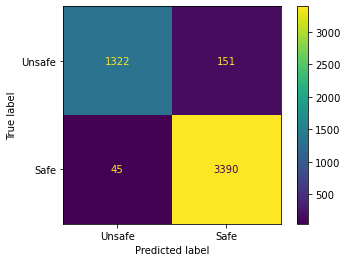

In [628]:
model_predict=xgb_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Creating pipeline 5.3

Target Encoding > XGBoost > Grid Search > Final Model

In [629]:
xgb_v3 = Pipeline(steps=[('preprocessor', preprocessor_target),
                        ('xgb', xgb)])

In [630]:
xgb_v3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, enable_categorical=False,
                               gamma...rtance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=400,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.75,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])

Grid Search

In [631]:
from sklearn.model_selection import GridSearchCV

In [632]:
xgb_params = { "xgb__n_estimators": [100,200], #,300,400,500
               "xgb__max_depth": [3,4], #,5,6,7
              #"objective": 'reg:squarederror',
               "xgb__colsample_bytree": [0.5,0.6,7],
               "xgb__subsample": [0.75,0.7]
              #"lambda": 100
           }

In [633]:
xgb_grid_v3 = GridSearchCV(xgb_v3,
                           param_grid=xgb_params,
                           cv = 5,
                           scoring = scorer)

In [634]:
xgb_grid_v3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_target',
                                                                         Pipeline(steps=[('tencoder',
                                                                                          TargetEncoder())]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=0.8,
                                                      en...
                                                      n_estimators=400,
                                                      n_jobs=8,
                                                      num_parallel_tree=1,
                                                      predictor='auto',
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=1,
                                                      subsample=0.75,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=0))]),
             param_grid={'xgb__colsample_bytree': [0.5, 0.6, 7],
                         'xgb__max_depth': [3, 4],
                         'xgb__n_estimators': [100, 200],
                         'xgb__subsample': [0.75, 0.7]},
             scoring=make_scorer(accuracy_score))

In [635]:
xgb_grid_v3.best_params_

{'xgb__colsample_bytree': 0.5,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 200,
 'xgb__subsample': 0.7}

In [636]:
xgb_grid_v3.best_score_

0.9609479727984056

In [637]:
xgb_grid_results = pd.DataFrame( xgb_grid_v3.cv_results_ )
xgb_grid_results[['mean_fit_time','mean_score_time','params']]

,mean_fit_time,mean_score_time,params
0,0.457649,0.015970,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
1,0.870373,0.026291,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
2,1.199130,0.019301,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
3,1.152879,0.019912,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
4,1.046438,0.030405,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
5,0.737487,0.022391,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
6,1.775691,0.027275,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
7,1.301825,0.021702,"{'xgb__colsample_bytree': 0.5, 'xgb__max_depth..."
8,0.959624,0.035741,"{'xgb__colsample_bytree': 0.6, 'xgb__max_depth..."
9,0.971296,0.033087,"{'xgb__colsample_bytree': 0.6, 'xgb__max_depth..."


Building the final XGBoost Model

In [638]:
final_model_xgb = XGBClassifier(n_estimators = xgb_grid_v3.best_params_['xgb__n_estimators'], 
                                      max_depth = xgb_grid_v3.best_params_['xgb__max_depth'],
                                      colsample_bytree = xgb_grid_v3.best_params_['xgb__colsample_bytree'],
                                      subsample = xgb_grid_v3.best_params_['xgb__subsample'])
                                       
xgb_final = Pipeline(steps=[('preprocessor', preprocessor_target),
                          ('XGBoost', final_model_xgb)])

In [639]:
xgb_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, enable_categorical=False,
                               g...ance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=3, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.7,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [640]:
xgb_final.score(X_test, y_test)

0.9594539527302364

In [641]:
from sklearn.metrics import mean_squared_error

In [642]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, xgb_final.predict(X_test)))
final_rmse_dt

0.2013604908361212

In [643]:
y_pred=xgb_final.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [644]:
xgb_final.score(X_test,y_test)

0.9594539527302364

In [745]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.9555827220863896
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3435
           1       0.94      0.91      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.95      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



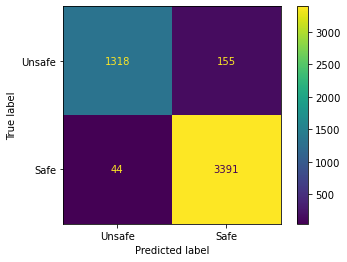

In [646]:
model_predict=xgb_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

#### Conclusion for XGBoost Classifier:
The highest accuracy (96%) is achieved for model 2, i.e.

OneHot Encoding > XGBoost > Grid Search > Final Model

# Logistic Regression Experiments

### Pipeline 6.1

Oversampling > One Hot Encoding > Logistic Regression > Grid Search > Final Model

In [725]:
lr_v1 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                              ('logistic', lr)])

In [726]:
lr_v1.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('logistic', LogisticRegression(random_state=100))])

In [727]:
logistic_params = { "logistic__max_iter":[500,100,1000],
                  "logistic__random_state":[50,100],
                  }

In [728]:
from sklearn import set_config
set_config(display='diagram') 
lr_v1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('logistic', LogisticRegression(random_state=100))])

In [729]:
logistic_grid_v1 = GridSearchCV(lr_v1,
                           param_grid=logistic_params,
                           cv = 10,
                           scoring = scorer)

In [730]:
logistic_grid_v1.fit(X_oversampled_train, y_oversampled_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('logistic',
                                        LogisticRegression(random_state=100))]),
             param_grid={'logistic__max_iter': [500, 100, 1000],
                         'logistic__random_state': [50, 100]},
             scoring=make_scorer(accuracy_score))

In [731]:
logistic_grid_v1.best_params_

{'logistic__max_iter': 500, 'logistic__random_state': 50}

In [732]:
logistic_grid_v1.best_score_

0.9491710707675161

In [733]:
logit_grid_results1 = pd.DataFrame( logistic_grid_v1.cv_results_ )
logit_grid_results1[['mean_fit_time','mean_score_time','param_logistic__max_iter','param_logistic__random_state', 'mean_test_score', 'std_test_score']]

,mean_fit_time,mean_score_time,param_logistic__max_iter,param_logistic__random_state,mean_test_score,std_test_score
0,0.105898,0.005488,500,50,0.949171,0.00471
1,0.105106,0.001420,500,100,0.949171,0.00471
2,0.106844,0.003604,100,50,0.949171,0.00471
3,0.093642,0.004419,100,100,0.949171,0.00471
4,0.098365,0.002935,1000,50,0.949171,0.00471
5,0.105934,0.001615,1000,100,0.949171,0.00471


Building the final Logistic Regression Model

In [735]:
final_model_logit1 = LogisticRegression(random_state = logistic_grid_v1.best_params_['logistic__random_state'], 
                                       #class_weight = logistic_grid_v1.best_params_['logistic__class_weight'], 
                                       max_iter = logistic_grid_v1.best_params_['logistic__max_iter'])

logit_final1 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('logistic', final_model_logit1)])

In [736]:
logit_final1.fit(X_oversampled_train, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('logistic',
                 LogisticRegression(max_iter=500, random_state=50))])

In [737]:
logit_final1.score(X_oversampled_train, y_oversampled_train)

0.9500385802469136

In [738]:
logit_final1.score(X_test, y_test)

0.9555827220863896

In [739]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, logit_final1.predict(X_test)))
final_rmse_dt

0.21075406974388522

In [740]:
y_pred=logit_final1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [741]:
logit_final1.score(X_test,y_test)

0.9555827220863896

In [743]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.9555827220863896
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3435
           1       0.94      0.91      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.95      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



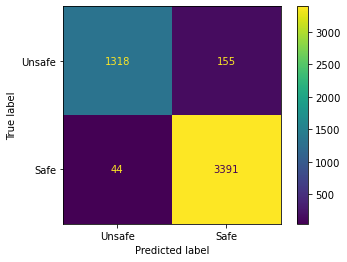

In [744]:
model_predict=xgb_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Pipeline 6.2 

One Hot Encoding > Logistic Regression > Grid Search > Final Model

In [747]:
logistic_v2 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                              ('logistic', lr)])

In [748]:
logistic_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('logistic', LogisticRegression(random_state=100))])

In [749]:
logistic_params = { "logistic__max_iter":[500,100,1000],
                  "logistic__random_state":[50,100],
                  #"logistic__class_weight":['balanced','none']
                  }

In [750]:
from sklearn import set_config
set_config(display='diagram') 
logistic_v2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('logistic', LogisticRegression(random_state=100))])

In [752]:
logistic_grid_v2 = GridSearchCV(logistic_v2,
                           param_grid=logistic_params,
                           cv = 10,
                           scoring = scorer)

In [753]:
logistic_grid_v2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_ohe',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('logistic',
                                        LogisticRegression(random_state=100))]),
             param_grid={'logistic__max_iter': [500, 100, 1000],
                         'logistic__random_state': [50, 100]},
             scoring=make_scorer(accuracy_score))

In [754]:
logistic_grid_v2.best_params_

{'logistic__max_iter': 500, 'logistic__random_state': 50}

In [755]:
logistic_grid_v2.best_score_

0.9606079724903334

In [756]:
logit_grid_results2 = pd.DataFrame( logistic_grid_v2.cv_results_ )
logit_grid_results2[['mean_fit_time','mean_score_time','param_logistic__max_iter','param_logistic__random_state', 'mean_test_score', 'std_test_score']]

,mean_fit_time,mean_score_time,param_logistic__max_iter,param_logistic__random_state,mean_test_score,std_test_score
0,0.065420,0.002422,500,50,0.960608,0.005005
1,0.062338,0.001199,500,100,0.960608,0.005005
2,0.063360,0.001991,100,50,0.960608,0.005005
3,0.070374,0.001460,100,100,0.960608,0.005005
4,0.067438,0.001703,1000,50,0.960608,0.005005
5,0.062053,0.005177,1000,100,0.960608,0.005005


In [757]:
final_model_logit2 = LogisticRegression(random_state = logistic_grid_v2.best_params_['logistic__random_state'], 
                                       #class_weight = logistic_grid_v2.best_params_['logistic__class_weight'], 
                                       max_iter = logistic_grid_v2.best_params_['logistic__max_iter'])

logit_final2 = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                          ('logistic', final_model_logit2)])

In [758]:
logit_final2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('logistic',
                 LogisticRegression(max_iter=500, random_state=50))])

In [759]:
logit_final2.score(X_train, y_train)

0.960880195599022

In [760]:
logit_final2.score(X_test, y_test)

0.9590464547677262

In [761]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, logit_final2.predict(X_test)))
final_rmse_dt

0.20236982292889877

In [762]:
y_pred=logit_final2.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [763]:
logit_final2.score(X_test,y_test)

0.9590464547677262

In [764]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.9590464547677262
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3435
           1       0.98      0.89      0.93      1473

    accuracy                           0.96      4908
   macro avg       0.96      0.94      0.95      4908
weighted avg       0.96      0.96      0.96      4908



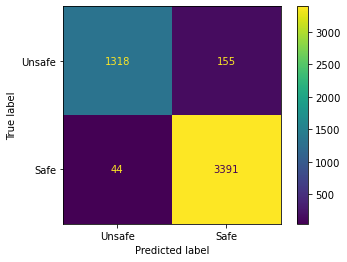

In [765]:
model_predict=xgb_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

### Pipeline 6.3 

Target Encoding > Logistic Regression > Grid Search > Final Model

In [767]:
logistic_v3 = Pipeline(steps=[('preprocessor', preprocessor_target),
                              ('logistic', lr)])

In [768]:
logistic_v3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('logistic', LogisticRegression(random_state=100))])

In [769]:
logistic_params = { "logistic__max_iter":[500,100,1000],
                  "logistic__random_state":[50,100],
                  #"logistic__class_weight":['balanced','none']
                  }

In [770]:
from sklearn import set_config
set_config(display='diagram') 
logistic_v3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('logistic', LogisticRegression(random_state=100))])

In [771]:
logistic_grid_v3 = GridSearchCV(logistic_v3,
                           param_grid=logistic_params,
                           cv = 10,
                           scoring = scorer)

In [772]:
logistic_grid_v3.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_target',
                                                                         Pipeline(steps=[('tencoder',
                                                                                          TargetEncoder())]),
                                                                         ['Area',
                                                                          'time_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [])])),
                                       ('logistic',
                                        LogisticRegression(random_state=100))]),
             param_grid={'logistic__max_iter': [500, 100, 1000],
                         'logistic__random_state': [50, 100]},
             scoring=make_scorer(accuracy_score))

In [773]:
logistic_grid_v3.best_params_

{'logistic__max_iter': 500, 'logistic__random_state': 50}

In [774]:
logistic_grid_v3.best_score_

0.8820969479618643

In [775]:
logit_grid_results3 = pd.DataFrame( logistic_grid_v3.cv_results_ )
logit_grid_results3[['mean_fit_time','mean_score_time','param_logistic__max_iter','param_logistic__random_state', 'mean_test_score', 'std_test_score']]

,mean_fit_time,mean_score_time,param_logistic__max_iter,param_logistic__random_state,mean_test_score,std_test_score
0,0.054860,0.003358,500,50,0.882097,0.005347
1,0.056175,0.004075,500,100,0.882097,0.005347
2,0.055479,0.004123,100,50,0.882097,0.005347
3,0.054673,0.002747,100,100,0.882097,0.005347
4,0.059575,0.001100,1000,50,0.882097,0.005347
5,0.062376,0.001004,1000,100,0.882097,0.005347


In [776]:
final_model_logit3 = LogisticRegression(random_state = logistic_grid_v3.best_params_['logistic__random_state'], 
                                       #class_weight = logistic_grid_v3.best_params_['logistic__class_weight'], 
                                       max_iter = logistic_grid_v3.best_params_['logistic__max_iter'])

logit_final3 = Pipeline(steps=[('preprocessor', preprocessor_target),
                          ('logistic', final_model_logit3)])

In [777]:
logit_final3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_target',
                                                  Pipeline(steps=[('tencoder',
                                                                   TargetEncoder())]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('logistic',
                 LogisticRegression(max_iter=500, random_state=50))])

In [779]:
logit_final3.score(X_train, y_train)

0.8829122521054061

In [780]:
logit_final3.score(X_test, y_test)

0.8691931540342298

In [781]:
final_rmse_dt = np.sqrt(mean_squared_error(y_test, logit_final3.predict(X_test)))
final_rmse_dt

0.3616722908459676

In [782]:
y_pred=logit_final3.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [783]:
logit_final3.score(X_test,y_test)

0.8691931540342298

In [784]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, labels=[0,1])) 

ACCURACY OF THE MODEL:  0.8691931540342298
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3435
           1       0.83      0.71      0.76      1473

    accuracy                           0.87      4908
   macro avg       0.86      0.82      0.84      4908
weighted avg       0.87      0.87      0.87      4908



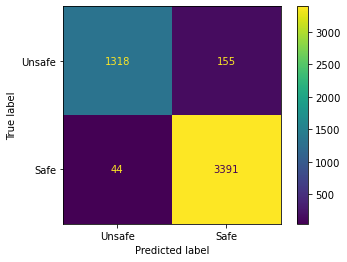

In [785]:
model_predict=xgb_final.predict(X_test)
cm_dt = confusion_matrix(y_test, model_predict, labels = [1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=['Unsafe','Safe'])
disp.plot()

#### Conclusion for Logistic Regression Classifier:
The highest accuracy (95.9%) is achieved for model 2, i.e.

OneHot Encoding > Logistic Regression > Grid Search > Final Model

## Best Model

From above we found that Gradient Boost algorithm with oversampling and One-Hot encoding gives the best accuracy.

### Feature Selection

Embedded method

In [905]:
encoder_df = pd.DataFrame(ohe_encoder.fit_transform(X_oversampled_train[cat_vars]).toarray())
encoder_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [906]:
#ohe_encoder.get_feature_names()
encoder_df.columns = ohe_encoder.get_feature_names_out()
encoder_df.head(5)

,Area_AIIMS,Area_Adarsh Nagar,Area_Adchini,Area_Ajmeri Gate,Area_Akbar Road,Area_Alaknanda,Area_Alipur,Area_Anand Parbat,Area_Anand Vihar,Area_Andrews Ganj,...,time_hour_14,time_hour_15,time_hour_16,time_hour_17,time_hour_18,time_hour_19,time_hour_20,time_hour_21,time_hour_22,time_hour_23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [907]:
final_df = encoder_df #X_hybrid_train[num_vars].join(encoder_df)
final_df.head(5)

,Area_AIIMS,Area_Adarsh Nagar,Area_Adchini,Area_Ajmeri Gate,Area_Akbar Road,Area_Alaknanda,Area_Alipur,Area_Anand Parbat,Area_Anand Vihar,Area_Andrews Ganj,...,time_hour_14,time_hour_15,time_hour_16,time_hour_17,time_hour_18,time_hour_19,time_hour_20,time_hour_21,time_hour_22,time_hour_23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [908]:
rf_reg = DecisionTreeClassifier(max_depth = 5, criterion = 'gini')
rf_reg.fit(final_df, y_oversampled_train) 

DecisionTreeClassifier(max_depth=5)

In [909]:
features_rf_imp = pd.DataFrame({"features": list(final_df),
                                "importance": rf_reg.feature_importances_})
features_rf_imp = features_rf_imp.sort_values("importance", ascending=False).reset_index()
features_rf_imp

,index,features,importance
0,229,time_hour_1,0.375898
1,240,time_hour_12,0.218385
2,251,time_hour_23,0.150246
3,238,time_hour_10,0.128993
4,88,Area_Karol Bagh,0.052597
...,...,...,...
247,90,Area_Katwaria Sarai,0.000000
248,91,Area_Khan Market,0.000000
249,92,Area_Khanpur,0.000000
250,93,Area_Khayala,0.000000


In [910]:
features_rf_imp['cumsum'] = features_rf_imp.importance.cumsum()
features_rf_imp.head(15)

,index,features,importance,cumsum
0,229,time_hour_1,0.375898,0.375898
1,240,time_hour_12,0.218385,0.594283
2,251,time_hour_23,0.150246,0.744529
3,238,time_hour_10,0.128993,0.873523
4,88,Area_Karol Bagh,0.052597,0.926120
5,43,Area_Dwarka,0.037268,0.963388
6,145,Area_Pitampura,0.014309,0.977697
7,34,Area_Connaught Place,0.009140,0.986837
8,98,Area_Lal Kuan,0.006788,0.993625
9,213,Area_Uttam Nagar,0.006375,1.000000


### Best model with selected features

In [911]:
selected_features_data = final_df[['time_hour_1','time_hour_12','time_hour_23','time_hour_10','Area_Karol Bagh','Area_Dwarka',
                                  'Area_Pitampura','Area_Connaught Place','Area_Lal Kuan','Area_Uttam Nagar']]
selected_features_data

,time_hour_1,time_hour_12,time_hour_23,time_hour_10,Area_Karol Bagh,Area_Dwarka,Area_Pitampura,Area_Connaught Place,Area_Lal Kuan,Area_Uttam Nagar
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20733,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20734,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [912]:
selected_features_data.dtypes

time_hour_1             float64
time_hour_12            float64
time_hour_23            float64
time_hour_10            float64
Area_Karol Bagh         float64
Area_Dwarka             float64
Area_Pitampura          float64
Area_Connaught Place    float64
Area_Lal Kuan           float64
Area_Uttam Nagar        float64
dtype: object

In [913]:
num_list = ['time_hour_1','time_hour_12','time_hour_23','time_hour_10','Area_Karol Bagh','Area_Dwarka',
                                  'Area_Pitampura','Area_Connaught Place','Area_Lal Kuan','Area_Uttam Nagar']

In [914]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_transformer_fs = Pipeline( steps = [('scaler', scaler)                            
                                     ])

In [915]:
preprocessor_fs = ColumnTransformer(
    transformers=[
        ('num',num_transformer_fs,num_list)
       # ('cat',cat_transformer,cat_vars)
        ])

In [916]:
gb_best= GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)

In [917]:
GradientBoost_final = Pipeline(steps=[('preprocessor', preprocessor_fs),
                         ('GradientBoost', gb_best)])

In [918]:
GradientBoost_final.fit(selected_features_data, y_oversampled_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['time_hour_1',
                                                   'time_hour_12',
                                                   'time_hour_23',
                                                   'time_hour_10',
                                                   'Area_Karol Bagh',
                                                   'Area_Dwarka',
                                                   'Area_Pitampura',
                                                   'Area_Connaught Place',
                                                   'Area_Lal Kuan',
                                                   'Area_Uttam Nagar'])])),
                ('GradientBoost', GradientBoostingClassifier())])

In [919]:
GradientBoost_final.score(selected_features_data, y_oversampled_train)

0.9449749228395061

In [920]:
X_test.head(5)

,Area,time_hour
15068,Race Course,1
8727,G.B. Road,23
7236,Bhalswa,10
4280,Greater Kailash,1
12674,Meena Bazaar,12


In [921]:
encoder_df_test = pd.DataFrame(ohe_encoder.fit_transform(X_test[cat_vars]).toarray())
encoder_df_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [922]:
#ohe_encoder.get_feature_names()
encoder_df_test.columns = ohe_encoder.get_feature_names_out()
encoder_df_test.head(5)

,Area_AIIMS,Area_Adarsh Nagar,Area_Adchini,Area_Ajmeri Gate,Area_Akbar Road,Area_Alaknanda,Area_Alipur,Area_Anand Parbat,Area_Anand Vihar,Area_Andrews Ganj,...,time_hour_14,time_hour_15,time_hour_16,time_hour_17,time_hour_18,time_hour_19,time_hour_20,time_hour_21,time_hour_22,time_hour_23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [923]:
final_df_test = encoder_df_test
final_df_test.head(5)

,Area_AIIMS,Area_Adarsh Nagar,Area_Adchini,Area_Ajmeri Gate,Area_Akbar Road,Area_Alaknanda,Area_Alipur,Area_Anand Parbat,Area_Anand Vihar,Area_Andrews Ganj,...,time_hour_14,time_hour_15,time_hour_16,time_hour_17,time_hour_18,time_hour_19,time_hour_20,time_hour_21,time_hour_22,time_hour_23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [924]:
selected_features_X_test = final_df_test[['time_hour_1','time_hour_12','time_hour_23','time_hour_10','Area_Karol Bagh','Area_Dwarka',
                                  'Area_Pitampura','Area_Connaught Place','Area_Lal Kuan','Area_Uttam Nagar']]

In [925]:
GradientBoost_final.fit(selected_features_X_test, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['time_hour_1',
                                                   'time_hour_12',
                                                   'time_hour_23',
                                                   'time_hour_10',
                                                   'Area_Karol Bagh',
                                                   'Area_Dwarka',
                                                   'Area_Pitampura',
                                                   'Area_Connaught Place',
                                                   'Area_Lal Kuan',
                                                   'Area_Uttam Nagar'])])),
                ('GradientBoost', GradientBoostingClassifier())])

In [926]:
GradientBoost_final.score(selected_features_X_test, y_test)

0.9602689486552567

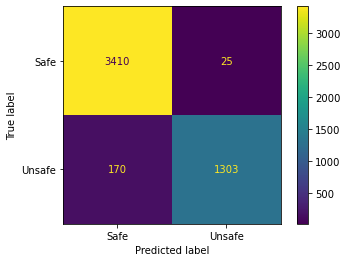

In [927]:
model_predict=GradientBoost_final.predict(selected_features_X_test)
cm = confusion_matrix(y_test, model_predict, labels = [0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Safe','Unsafe'])
disp.plot()

In [928]:
import sklearn.metrics as metrics
final_acc_fs = metrics.accuracy_score(y_test, model_predict)
print(final_acc_fs)

0.9602689486552567


### Model Persistence

In [951]:
class PredictionModel():
    
    def __init__(self, model, features, acc):
        self.model = model
        self.features = features
        self.acc = acc

In [952]:
safety_model = PredictionModel(gb_final1, list(X_oversampled_train.columns), final_score)

In [953]:
from joblib import dump

In [954]:
dump(safety_model, './suraksha_app_model_safety.pkl')

['./suraksha_app_model_safety.pkl']

Testing

In [955]:
from joblib import load

In [956]:
model_v1 = load("suraksha_app_model_safety.pkl")

In [957]:
type(model_v1)

__main__.PredictionModel

In [958]:
model_v1.model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'time_hour']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('gradientBoost', GradientBoostingClassifier())])

In [960]:
model_v1.acc

0.960880195599022

In [961]:
model_v1.features

['Area', 'time_hour']

# ****